In [31]:
import seaborn as sns
import torch

import pyro
import pyro.distributions as dist

import matplotlib.pyplot as plt
sns.set(rc={'figure.figsize':(4,2)})

In [2]:
from rethinking import MAP, precis

probability of having generated 6 head given 9 realisation with probability of head 0.5

In [3]:
dist.Binomial(total_count=9, probs=0.5).log_prob(torch.tensor(6.)).exp()

tensor(0.1641)

In [6]:
# define grid
p_grid = torch.linspace(start=0, end=1, steps=20)

# define prior
prior = torch.tensor(1.).repeat(20)

# compute likelihood at each value in grid
likelihood = dist.Binomial(total_count=9,
                           probs=p_grid).log_prob(torch.tensor(6.)).exp()

# compute product of likelihood and prior
unstd_posterior = likelihood * prior

# standardize the posterior, so it sums to 1
posterior = unstd_posterior / unstd_posterior.sum()

In [ ]:
# p represent the probability of water which is our model parameter

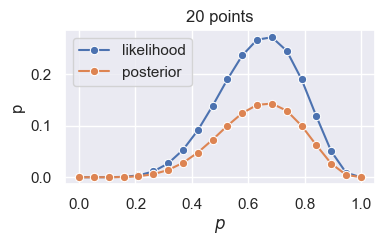

In [57]:
ax = sns.lineplot(x=p_grid, y=likelihood, marker="o", label="likelihood")
ax = sns.lineplot(x=p_grid, y=posterior, marker="o", label="posterior")
ax.set(xlabel="$p$", ylabel="p",
       title="20 points");

In [58]:
def model(w):
    p = pyro.sample("p", dist.Uniform(0, 1))  # uniform prior
    pyro.sample("w", dist.Binomial(9, p), obs=w)  # binomial likelihood

globe_qa = MAP(model).run(torch.tensor(6.))

# display summary of quadratic approximation
precis(globe_qa)

,Mean,StdDev,|0.89,0.89|
p,0.45,0.14,0.22,0.67


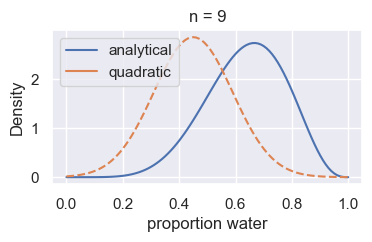

In [59]:
# analytical calculation
w = 6
n = 9
x = torch.linspace(0, 1, 101)
ax = sns.lineplot(x=x, y=dist.Beta(w + 1, n - w + 1).log_prob(x).exp(), label="analytical")
ax.set(xlabel="proportion water", ylabel="Density", title="n = 9")
# quadratic approximation
precis_df = precis(globe_qa)
sns.lineplot(x=x, y=dist.Normal(precis_df["Mean"][0],
                            precis_df["StdDev"][0]).log_prob(x).exp(), label="quadratic")
ax.lines[1].set_linestyle("--")